In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split,KFold, cross_val_score 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding the dataset

In [3]:
# Reading the dataset

housing = pd.read_csv(r"C:\Users\Lenovo\Downloads\train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# shape of the dataset

housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Statistical data

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Checking the no of columns

housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Checking null values in the dataset

housing.isnull().sum().head(15)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

## Dataset Cleaning

In [9]:
#Dropping duplicate values (if any)

housing.drop_duplicates(keep='first')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### There are no duplicate values in the dataset

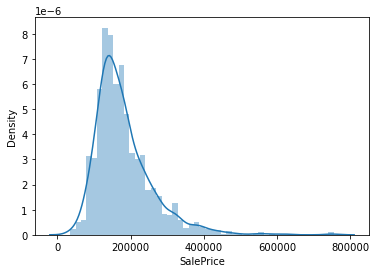

In [10]:
#Lets visualize the distribution of saleprice

sns.distplot(housing['SalePrice'])
plt.show()

In [11]:
# Removing id column as it is of no use

housing.drop(['Id'], axis=1, inplace=True)

In [12]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Checking for percentage of null values

round((housing.isnull().sum()/housing.shape[0])*100).round(2).head(50)

MSSubClass       0.0
MSZoning         0.0
LotFrontage     18.0
LotArea          0.0
Street           0.0
Alley           94.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       1.0
MasVnrArea       1.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         3.0
BsmtCond         3.0
BsmtExposure     3.0
BsmtFinType1     3.0
BsmtFinSF1       0.0
BsmtFinType2     3.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [14]:
# Dropping Columns with more than 15 % missing values

housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)

print((housing.isnull().sum()/housing.shape[0])*100)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


In [15]:
# Shape of the dataset after dropping the columns

housing.shape

(1460, 74)

In [16]:
#identifying numerical and non-numerical columns 

NonNumCols = []
NumCols = []

for col in list(housing):
    if housing[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Scree

In [17]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in NonNumCols:
    value_counts.append(len(housing[col].value_counts()))
data_val = {'cat_column': NonNumCols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,cat_column,value_counts
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [18]:
# The below mentioned columns are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing[col].fillna('No Garage', inplace=True)
housing['GarageYrBlt'].fillna(0, inplace=True)

In [19]:
#The below mentioned columns are nan when there is 'No Basement'. So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing[col].fillna('No Basement', inplace=True)

In [20]:
housing.dropna(inplace = True)

In [21]:
housing.isnull().sum()


MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### There are no null values in the dataset

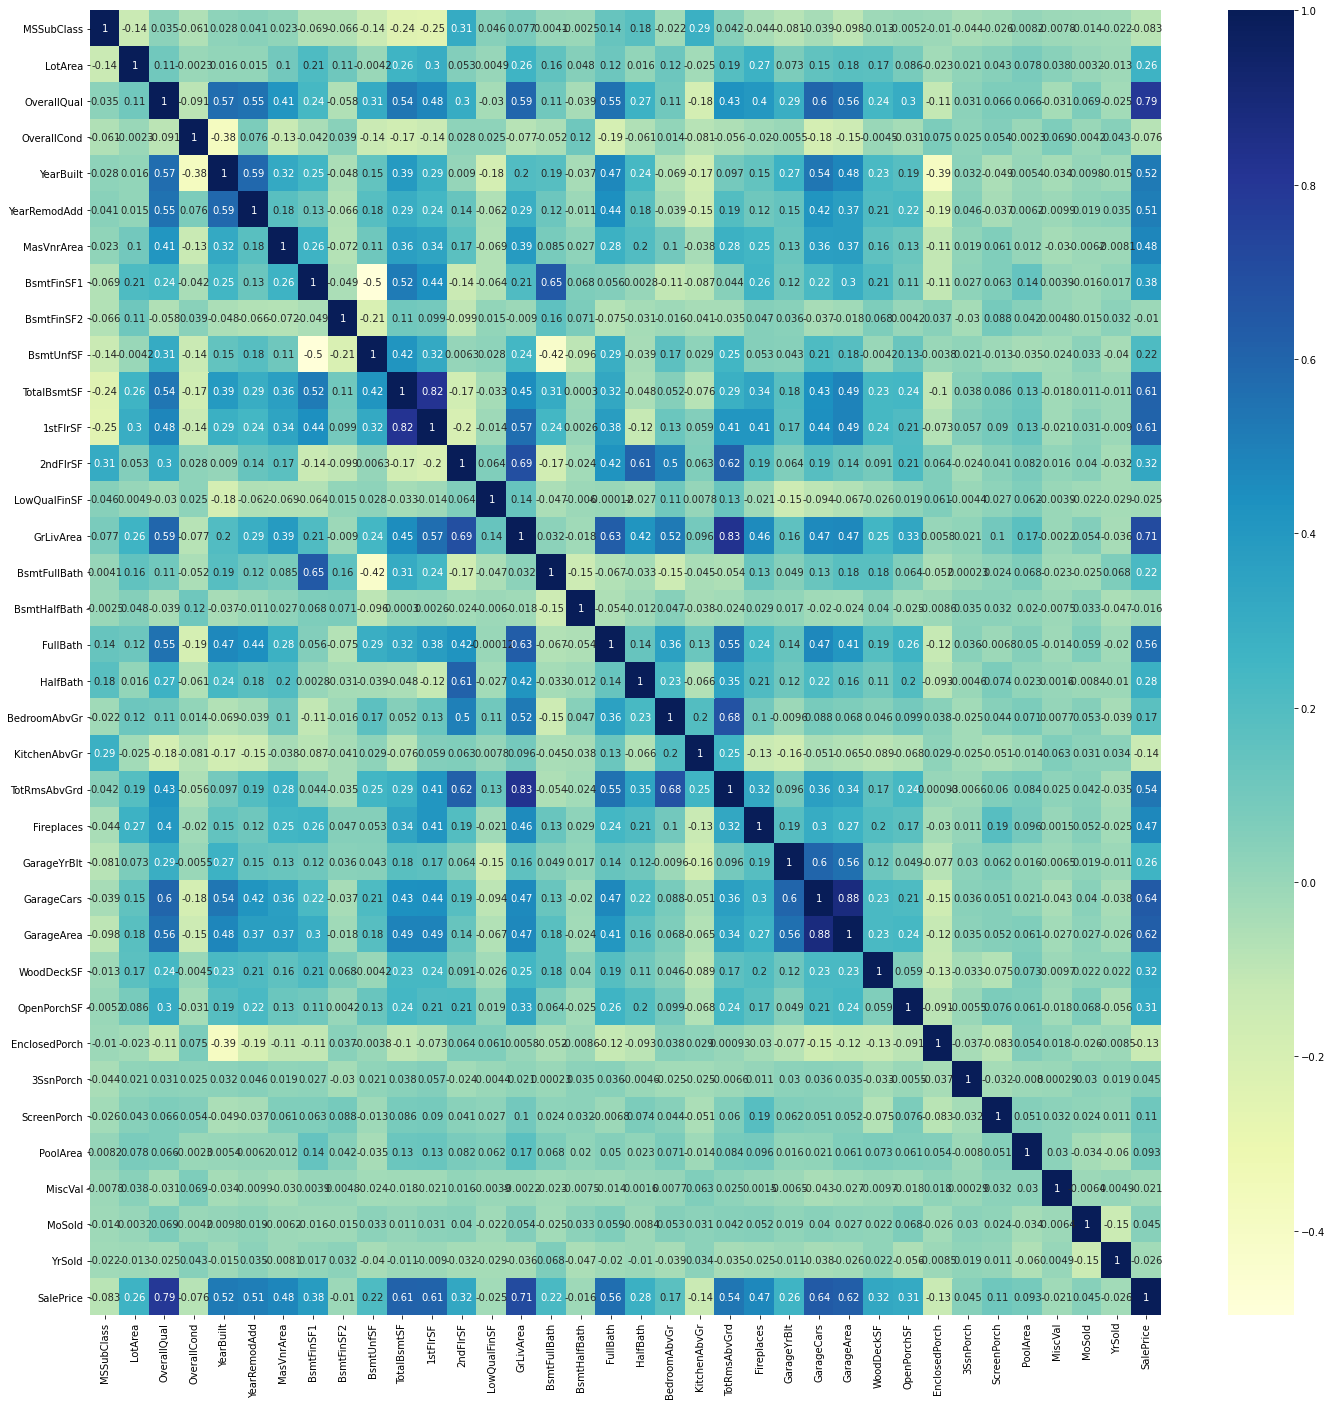

In [22]:
plt.figure(figsize=(24, 24))
sns.heatmap(housing.corr(),cmap="YlGnBu", annot = True)
plt.show()

In [23]:
#Identifying highly correlated varaibles
corr_var = housing.corr().abs()
upper_triangle = corr_var.where(np.triu(np.ones(corr_var.shape), k=1).astype(np.bool))
drop_col = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
drop_col

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [24]:
# let's drop these three columns
housing.drop(housing[drop_col], axis=1, inplace = True)
housing.shape

(1451, 71)

In [25]:
# Getting derived features
import datetime

housing['CurrentYear'] = datetime.datetime.now().year
housing["Age"] = housing['CurrentYear'] - housing['YearBuilt']
housing.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

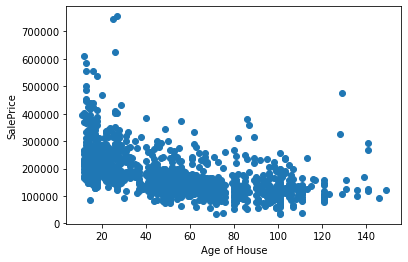

In [26]:
plt.scatter(x=housing['Age'], y=housing['SalePrice'])
plt.xlabel("Age of House")
plt.ylabel("SalePrice")
plt.show()

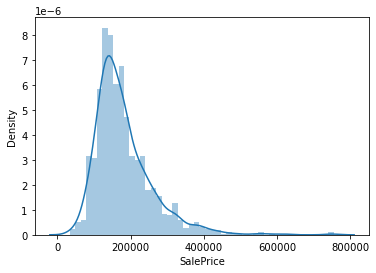

In [27]:
# Let's see the distribution of our target variable before scaling and Splitting

sns.distplot(housing.SalePrice)
plt.show()

### Creating Dummies

In [28]:
# Creating dummies for categorical variables

housing_dummy = pd.get_dummies(housing[NonNumCols], drop_first=True)


In [29]:
# Adding the dummies dataframe to the original dataset

df_concat = pd.concat([housing, housing_dummy], axis=1)
df_concat.shape

(1451, 276)

In [30]:
# Dropping the original columns 
housing_final = df_concat.drop(NonNumCols, axis = 1)
housing_final.shape

(1451, 238)

### Train-Test Split

In [31]:
# preparing train and test dataset

X = housing_final.drop('SalePrice', axis=1)
y = housing_final['SalePrice']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [33]:
# Shape after splitting into train and test

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1015, 237), (436, 237), (1015,), (436,))

### SCALING THE DATASET

In [34]:
scaler = StandardScaler()

In [35]:
#identifying numerical and non-numerical columns again

NonNumCols = []
NumCols = []

for col in list(housing):
    if housing[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Sa

In [36]:
#Scaling the numerical columns

Num_Col = NumCols.copy()
Num_Col.remove('SalePrice')
X_train[Num_Col] = scaler.fit_transform(X_train[Num_Col])
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-0.513865,-1.552452,1.293141,0.238209,-0.562965,-0.502945,-0.297804,0.936307,0.294756,...,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.315476,-0.824292,-0.538734,-0.301373,-0.562965,1.097605,-0.297804,-1.320626,-0.273317,...,0,0,0,0,1,0,0,0,1,0
1181,1.508340,-0.443913,1.360189,-0.538734,1.121161,0.447197,2.249743,-0.297804,-1.049523,1.201876,...,0,0,1,0,0,0,0,0,0,1
808,0.548788,0.250537,-0.824292,-0.538734,-0.939061,5.123271,0.181472,0.484095,-0.462133,-0.091444,...,0,0,0,0,1,0,0,0,1,0
1095,-0.890540,-0.112376,-0.096131,-0.538734,1.023055,-0.562965,-0.874119,-0.297804,1.593732,0.559707,...,0,0,0,0,1,0,0,0,1,0


In [37]:
X_test[Num_Col] = scaler.transform(X_test[Num_Col])
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-0.565062,-0.824292,-0.538734,-0.448532,-0.562965,0.949564,-0.297804,-0.715162,0.173507,...,0,0,0,0,1,0,0,0,1,0
824,-0.890540,0.056414,1.360189,-0.538734,1.023055,-0.562965,-0.925611,-0.297804,2.043312,0.952643,...,0,0,1,0,0,0,0,0,0,1
369,-0.890540,-0.066779,-0.824292,1.293141,1.023055,-0.562965,-0.771134,1.278212,0.335362,-0.003876,...,0,0,0,0,1,0,0,0,1,0
291,3.187555,-0.435025,-0.824292,0.377204,0.728738,-0.562965,-0.475054,-0.297804,-0.032886,-0.639309,...,0,0,0,0,1,0,0,0,1,0
134,-0.890540,-0.021893,-0.824292,0.377204,0.385367,-0.562965,0.297330,-0.297804,0.692315,0.889773,...,0,0,0,0,1,0,0,0,1,0


### Model Building

## Lasso Regression


In [38]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.214548,0.005539,0.006061,0.007429,0.0001,{'alpha': 0.0001},-24154.684388,-13873.064528,-22081.626978,-21063.927281,...,-20474.057659,3480.660076,27,-11466.474123,-12793.735479,-12267.764928,-12573.268475,-11297.699582,-12079.788517,596.052936
1,0.210516,0.014511,0.003125,0.006250,0.001,{'alpha': 0.001},-24154.158932,-13873.067255,-22079.652380,-21064.009676,...,-20473.425698,3480.337431,26,-11466.448924,-12793.720273,-12267.747350,-12573.256024,-11297.701307,-12079.774776,596.050856
2,0.211527,0.013343,0.003125,0.006250,0.01,{'alpha': 0.01},-24148.852862,-13873.094471,-22059.908243,-21064.841616,...,-20467.232547,3477.135548,25,-11466.351666,-12793.646860,-12267.650542,-12573.218288,-11297.837952,-12079.741062,596.005077
3,0.206795,0.006017,0.010974,0.006231,0.05,{'alpha': 0.05},-24136.402542,-13873.214438,-21973.130597,-21058.941209,...,-20443.539178,3465.870334,24,-11466.595394,-12793.709887,-12267.287437,-12573.237333,-11298.591602,-12079.884331,595.752580
4,0.212479,0.016117,0.006250,0.007655,0.1,{'alpha': 0.1},-24130.521088,-13873.816127,-21864.912077,-21041.161776,...,-20415.039945,3453.945282,23,-11466.997678,-12794.129474,-12267.154915,-12573.852132,-11299.563850,-12080.339610,595.608874


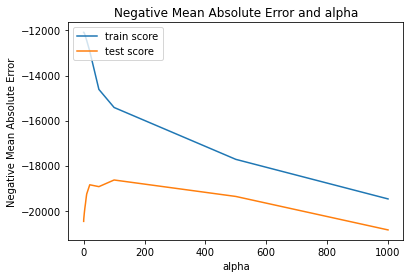

In [40]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [42]:
lasso.coef_


array([-5.87375023e+03,  4.66012589e+03,  1.56596016e+04,  5.83724450e+03,
        1.43720743e+03,  3.14130806e+03, -1.35270839e+02, -1.17353775e+02,
        0.00000000e+00, -3.28706174e+02,  4.22446212e+03, -8.21376751e+02,
        2.65373703e+04,  5.00216989e+03, -1.27478364e+02,  3.27024590e+03,
        1.82748154e+03, -1.84184715e+02, -2.90816026e+03,  2.10083600e+03,
       -2.33989934e+03,  9.78218802e+03,  2.16315680e+03, -7.64563534e+01,
        1.97501735e+02,  1.19174921e+03,  1.74100619e+03,  1.50019148e+02,
       -5.53758056e+02,  1.90463579e+02, -4.04094899e+02, -4.84096489e+03,
        1.35341699e+03,  0.00000000e+00,  2.28210843e+03, -3.71778565e+03,
        1.01306316e+04,  2.13630860e+03, -2.40863500e+04, -1.43407973e+03,
        1.13729186e+04,  2.90951308e+03,  1.04819259e+04, -0.00000000e+00,
        9.58816961e+03, -3.54585960e+03, -0.00000000e+00,  0.00000000e+00,
        7.47971844e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        7.27168512e+03, -

In [43]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [44]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
0,MSSubClass,150859.635253
112,Exterior1st_AsphShn,39053.034464
65,Neighborhood_NridgHt,35028.492536
66,Neighborhood_OldTown,30217.175477
72,Neighborhood_Timber,27211.565810
13,BsmtFullBath,26537.370294
106,RoofMatl_Membran,20592.742800
56,Neighborhood_Edwards,19511.067144
133,Exterior2nd_MetalSd,17980.283251
165,BsmtExposure_Mn,17292.711437


## Ridge regression


In [45]:
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018749,0.015308,0.003121,0.006242,0.0001,{'alpha': 0.0001},-24203.190083,-16232.176830,-22036.159635,-21035.662887,...,-20946.556795,2611.669011,26,-11443.988235,-12712.904718,-12244.807339,-12543.895789,-11295.330820,-12048.185380,575.861959
1,0.012942,0.007402,0.007849,0.006988,0.001,{'alpha': 0.001},-24198.007683,-16197.956984,-21964.916362,-20953.056143,...,-20900.895994,2615.619854,25,-11444.263999,-12709.253321,-12240.297217,-12549.527315,-11293.947329,-12047.457836,575.995649
2,0.012740,0.006372,0.003198,0.003916,0.01,{'alpha': 0.01},-24151.415261,-16064.243569,-21360.462443,-20357.098316,...,-20586.298280,2606.937777,23,-11447.875862,-12809.985506,-12279.127800,-12653.451042,-11376.326042,-12113.353250,598.423360
3,0.006250,0.007655,0.009368,0.007649,0.05,{'alpha': 0.05},-24013.800301,-16906.904545,-20194.745795,-20256.372152,...,-20458.373126,2261.744202,19,-11472.607166,-13541.699360,-12812.846005,-13289.579841,-12156.795653,-12654.705605,756.320387
4,0.009381,0.007660,0.009373,0.007653,0.1,{'alpha': 0.1},-23898.073212,-17564.627683,-19779.596495,-20444.261984,...,-20554.787352,2050.141656,22,-11504.627453,-14138.935355,-13381.663522,-13809.137494,-12851.228268,-13137.118418,923.234429


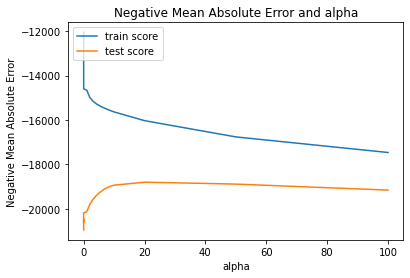

In [47]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [48]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ -5193.69115722,   4334.73509797,  16311.64589957,   5378.03722093,
         1454.56729609,   3426.57134754,   -901.11343254,   -183.03535944,
          213.87550404,   -797.75946707,   6606.63163095,   -548.82474451,
        23062.44083901,   5361.11338341,   -441.89280993,   3650.4878005 ,
         2513.43069677,    419.19225062,  -2967.15016251,   2752.55079172,
        -1736.88046482,  10655.22030511,   2488.34998489,   -891.32245266,
          542.53537101,   1578.15749345,   1836.59159408,    676.09206515,
         -652.39277624,    196.95883814,   -524.29701165,  -2652.66519955,
         6629.06719781,   4584.35606892,   5622.96297987,  -1130.17564912,
         9275.00095808,   6426.74466716, -13135.54430895,  -1812.69174238,
        13501.0263688 ,   6551.9278018 ,  14632.03887787,  -2882.43966629,
         8196.76110223,  -6309.35547288,  -4620.66289279,  -1072.25908188,
         4750.02600617,  -2774.50422592,  -1930.61125656,   1426.60790187,
         4758.51663019,  

In [49]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [50]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,147741.575981
65,Neighborhood_NridgHt,25318.272664
66,Neighborhood_OldTown,23360.948642
13,BsmtFullBath,23062.440839
72,Neighborhood_Timber,19301.131473
3,OverallCond,16311.645900
112,Exterior1st_AsphShn,15706.021237
43,Utilities_NoSeWa,14632.038878
84,Condition2_PosA,14443.130180
133,Exterior2nd_MetalSd,13617.863057


In [51]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


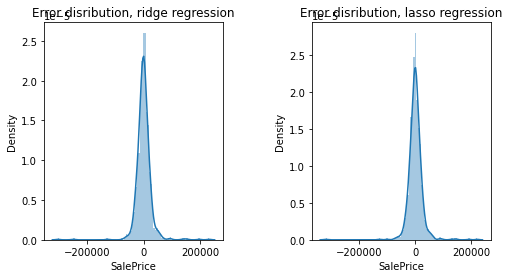

In [52]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [53]:
from sklearn.metrics import r2_score

print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8886763786820451
r2_score for lasso: 0.8970790088852431


In [54]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


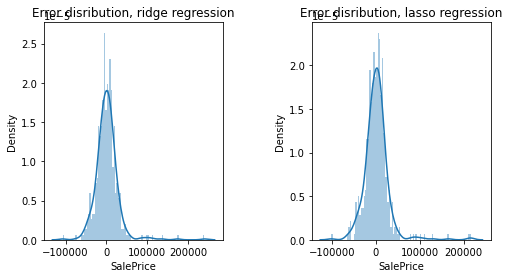

In [55]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [56]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.87


In [57]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 150859.635),
 ('MSSubClass', -5873.75),
 ('LotArea', 4660.126),
 ('OverallQual', 15659.602),
 ('OverallCond', 5837.245),
 ('YearRemodAdd', 1437.207),
 ('MasVnrArea', 3141.308),
 ('BsmtFinSF1', -135.271),
 ('BsmtFinSF2', -117.354),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -328.706),
 ('2ndFlrSF', 4224.462),
 ('LowQualFinSF', -821.377),
 ('GrLivArea', 26537.37),
 ('BsmtFullBath', 5002.17),
 ('BsmtHalfBath', -127.478),
 ('FullBath', 3270.246),
 ('HalfBath', 1827.482),
 ('BedroomAbvGr', -184.185),
 ('KitchenAbvGr', -2908.16),
 ('Fireplaces', 2100.836),
 ('GarageYrBlt', -2339.899),
 ('GarageCars', 9782.188),
 ('WoodDeckSF', 2163.157),
 ('OpenPorchSF', -76.456),
 ('EnclosedPorch', 197.502),
 ('3SsnPorch', 1191.749),
 ('ScreenPorch', 1741.006),
 ('PoolArea', 150.019),
 ('MiscVal', -553.758),
 ('MoSold', 190.464),
 ('YrSold', -404.095),
 ('Age', -4840.965),
 ('MSZoning_FV', 1353.417),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 2282.108),
 ('MSZoning_RM', -3717.786),
 ('Street_Pave', 10

In [58]:
#Features (including dummies) along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 150859.635),
 ('MSSubClass', -5873.75),
 ('LotArea', 4660.126),
 ('OverallQual', 15659.602),
 ('OverallCond', 5837.245),
 ('YearRemodAdd', 1437.207),
 ('MasVnrArea', 3141.308),
 ('BsmtFinSF1', -135.271),
 ('BsmtFinSF2', -117.354),
 ('TotalBsmtSF', -328.706),
 ('2ndFlrSF', 4224.462),
 ('LowQualFinSF', -821.377),
 ('GrLivArea', 26537.37),
 ('BsmtFullBath', 5002.17),
 ('BsmtHalfBath', -127.478),
 ('FullBath', 3270.246),
 ('HalfBath', 1827.482),
 ('BedroomAbvGr', -184.185),
 ('KitchenAbvGr', -2908.16),
 ('Fireplaces', 2100.836),
 ('GarageYrBlt', -2339.899),
 ('GarageCars', 9782.188),
 ('WoodDeckSF', 2163.157),
 ('OpenPorchSF', -76.456),
 ('EnclosedPorch', 197.502),
 ('3SsnPorch', 1191.749),
 ('ScreenPorch', 1741.006),
 ('PoolArea', 150.019),
 ('MiscVal', -553.758),
 ('MoSold', 190.464),
 ('YrSold', -404.095),
 ('Age', -4840.965),
 ('MSZoning_FV', 1353.417),
 ('MSZoning_RL', 2282.108),
 ('MSZoning_RM', -3717.786),
 ('Street_Pave', 10130.632),
 ('LotShape_IR2', 2136.309),
 ('Lo

In [59]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(housing):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Age']
65


In [60]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(housing):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition']
42


In [61]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(housing):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'OpenPorchSF', 'MiscVal', 'YrSold', 'Age']
37


### Highlights:

#### Optimum value for lambda in lasso regression is 100

#### Optimum value for lambda in ridge regression is 10 

#### The company can purchase houses below the market value by highlighting the negative parameters. 

### r2_score in train dataset:
    r2_score for lasso: 0.9 
    r2_score for ridge: 0.89
    
### r2_score in test dataset:
    r2_score for lasso: 0.87
    r2_score for ridge: 0.87